# Show the effect of sampling rate.

## Problem 01: 

You have the analog signal:
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msub><mi>x</mi><mi>a</mi></msub><mo stretchy="false">(</mo><mi>t</mi><mo stretchy="false">)</mo><mo>=</mo><mn>3</mn><mi>cos</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>100</mn><mi>π</mi><mi>t</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">x_a(t) = 3 \cos(100\pi t)</annotation></semantics></math>xa​(t)=3cos(100πt)
Now, you are **sampling** it at two different rates:

- (a) **200 Hz**
- (b) **75 Hz**

* * *

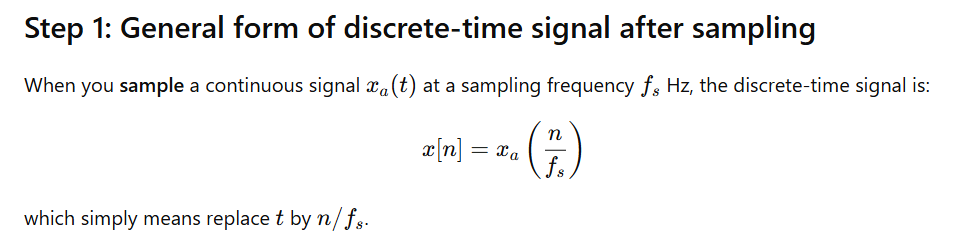

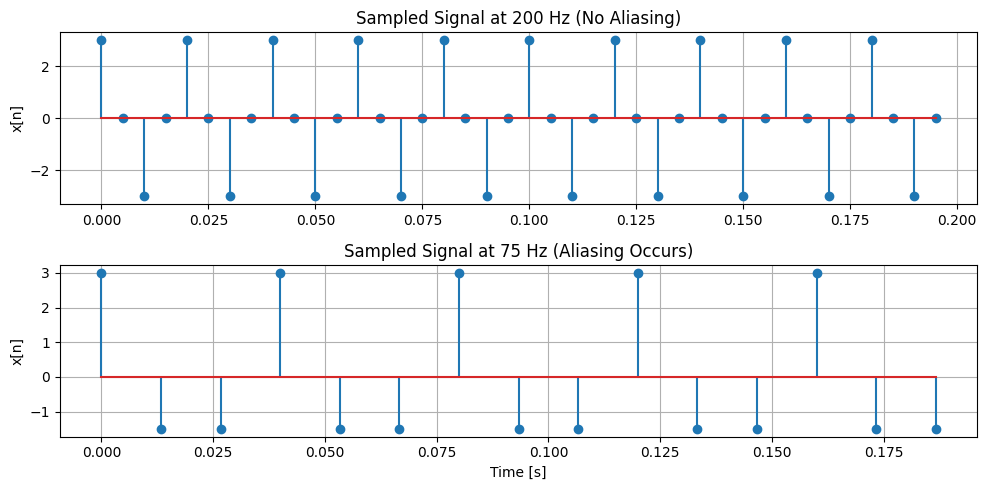

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Analog signal parameters
A = 3
f_analog = 50  # Because 100π = 2πf → f = 50 Hz
t_max = 0.2  # Time duration for visualization

# Sampling rates
fs1 = 200  # Hz
fs2 = 75  # Hz

# Time vectors for sampled signals
n1 = np.arange(0, t_max, 1/fs1)
n2 = np.arange(0, t_max, 1/fs2)

# Sampled signals
x1 = A * np.cos(2 * np.pi * f_analog * n1)  # 200 Hz sampling
x2 = A * np.cos(2 * np.pi * f_analog * n2)  # 75 Hz sampling

# Plotting
plt.figure(figsize=(10, 5))

# 200 Hz plot
plt.subplot(2, 1, 1)
plt.stem(n1, x1)
plt.title("Sampled Signal at 200 Hz (No Aliasing)")
plt.ylabel("x[n]")
plt.grid(True)

# 75 Hz plot
plt.subplot(2, 1, 2)
plt.stem(n2, x2)
plt.title("Sampled Signal at 75 Hz (Aliasing Occurs)")
plt.xlabel("Time [s]")
plt.ylabel("x[n]")
plt.grid(True)

plt.tight_layout()
plt.show()


### Notes:

- It uses `stem()` for discrete-time plotting.
- At **200 Hz**, sampling meets Nyquist (since <math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>2</mn><mi>f</mi><mo>=</mo><mn>100</mn></mrow><annotation encoding="application/x-tex">2f = 100</annotation></semantics></math>2f=100 Hz &gt; 2×50 Hz), so no aliasing.
- At **75 Hz**, <math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>f</mi><mi>s</mi></msub><mo>&lt;</mo><mn>2</mn><mi>f</mi></mrow><annotation encoding="application/x-tex">f_s &lt; 2f</annotation></semantics></math>fs​&lt;2f, so aliasing distorts the frequency content.

## Problem 2:
<b>Consider the analog signal: 𝑥(𝑡) = 3cos(2000πt) + 5sin(6000πt) +

10cos(12000πt). Show the effect of sampling rate.</b>

You have:
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msub><mi>x</mi><mi>a</mi></msub><mo stretchy="false">(</mo><mi>t</mi><mo stretchy="false">)</mo><mo>=</mo><mn>3</mn><mi>cos</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>2000</mn><mi>π</mi><mi>t</mi><mo stretchy="false">)</mo><mo>+</mo><mn>5</mn><mi>sin</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>6000</mn><mi>π</mi><mi>t</mi><mo stretchy="false">)</mo><mo>+</mo><mn>10</mn><mi>cos</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>12000</mn><mi>π</mi><mi>t</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">x_a(t) = 3\cos(2000\pi t) + 5\sin(6000\pi t) + 10\cos(12000\pi t)</annotation></semantics></math>
- Frequencies present: **1000 Hz**, **3000 Hz**, **6000 Hz**.

✅ **Nyquist Rate**: Minimum sampling rate = **2 × 6000 = 12000 Hz**.

* * *

**If Sampling Rate:**

- <math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>f</mi><mi>s</mi></msub><mo>&gt;</mo><mn>12000</mn></mrow><annotation encoding="application/x-tex">f_s &gt; 12000</annotation></semantics></math>fs​&gt;12000 Hz → No aliasing, signal preserved.
- <math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>f</mi><mi>s</mi></msub><mo>=</mo><mn>12000</mn></mrow><annotation encoding="application/x-tex">f_s = 12000</annotation></semantics></math>fs​=12000 Hz → Barely no aliasing (risky).
- <math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>f</mi><mi>s</mi></msub><mo>&lt;</mo><mn>12000</mn></mrow><annotation encoding="application/x-tex">f_s &lt; 12000</annotation></semantics></math>fs​&lt;12000 Hz → **Aliasing occurs** (high frequencies fold into lower ones).

Example:

- Sampling at 8000 Hz:

    - 1000 Hz → OK
    - 3000 Hz → OK
    - 6000 Hz → aliases to 2000 Hz.

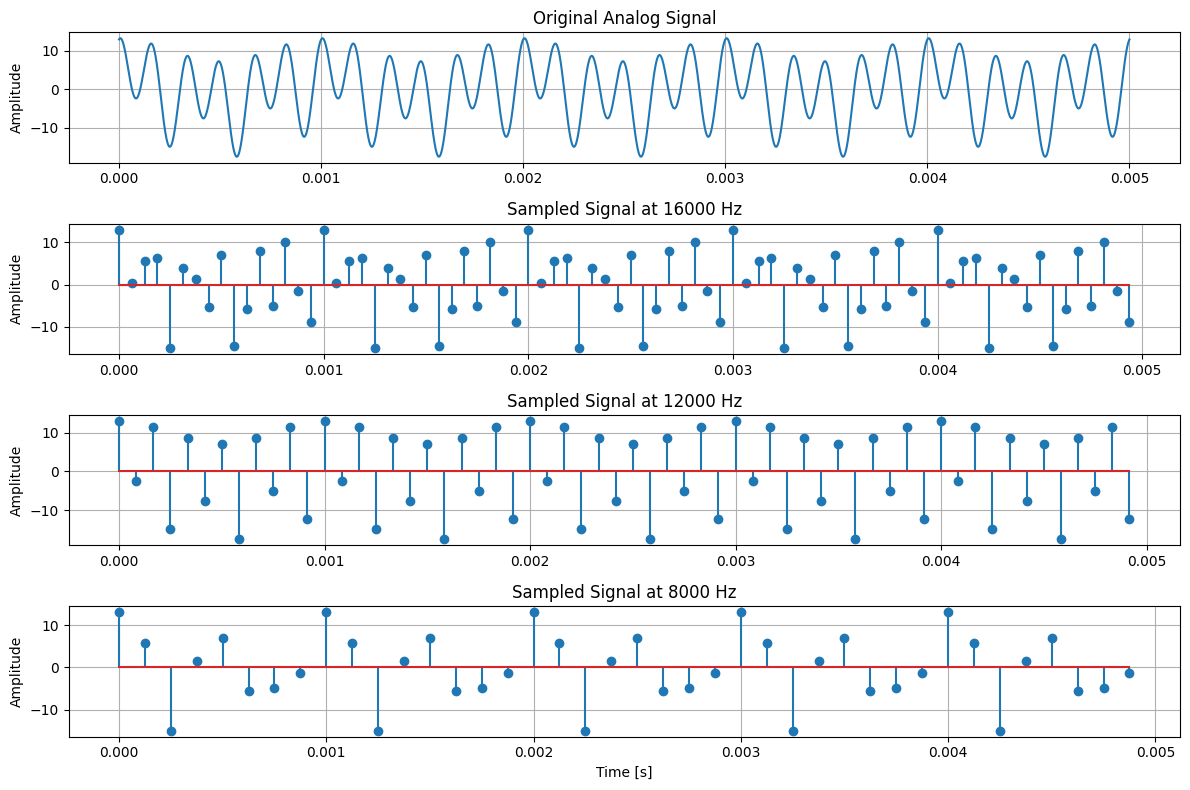

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
A1, A2, A3 = 3, 5, 10
f1, f2, f3 = 1000, 3000, 6000  # Frequencies in Hz
t_max = 0.005  # short time window

# Define sampling rates
sampling_rates = [16000, 12000, 8000]  # >Nyquist, Nyquist, <Nyquist

# High-resolution time vector (for original signal)
t_cont = np.linspace(0, t_max, 10000)
x_cont = A1 * np.cos(2*np.pi*f1*t_cont) + A2 * np.sin(2*np.pi*f2*t_cont) + A3 * np.cos(2*np.pi*f3*t_cont)

# Plotting
plt.figure(figsize=(12, 8))

# Plot original continuous signal
plt.subplot(4, 1, 1)
plt.plot(t_cont, x_cont)
plt.title('Original Analog Signal')
plt.ylabel('Amplitude')
plt.grid(True)


#Sample and plot for each sampling rate
for i, fs in enumerate(sampling_rates):
    n = np.arange(0, t_max, 1/fs)  # sample indices
    x_sampled = A1 * np.cos(2*np.pi*f1*n) + A2 * np.sin(2*np.pi*f2*n) + A3 * np.cos(2*np.pi*f3*n)

    plt.subplot(len(sampling_rates)+1, 1, i+2)
    plt.stem(n, x_sampled)
    plt.title(f'Sampled Signal at {fs} Hz')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.xlabel('Time [s]')
plt.tight_layout()
plt.show()
